<a href="https://colab.research.google.com/github/Kjgwo/BigData/blob/main/BigData_12%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adaboost 구현
breast_cancer dataset 사용

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
cdata = load_breast_cancer()

dataset 구축

In [ ]:
X = cdata.data
X = X.astype(float)
y = np.where(cdata.target == 0, -1, 1)
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=1)

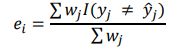

In [ ]:
def compute_error (y, y_pred, w_j):
    return (np.sum((w_j * np.not_equal(y, y_pred)),  axis =-1).astype(int))/np.sum(w_j)

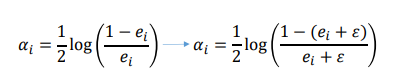

In [ ]:
def compute_alpha(error):
    return 0.5*np.log(1-error + 1e-6)/(error+1e-6)

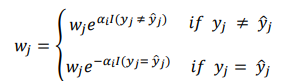

In [ ]:
def update_weights(w_j, alpha, y, y_pred):
    w_j_update = np.where(np.not_equal(y, y_pred),
                             w_j * np.exp(alpha * (np.not_equal(y, y_pred))),
                             w_j * np.exp(-alpha * (np.equal(y, y_pred))))
    w_j_update = w_j_update / np.sum(w_j_update)

    return w_j_update

AdaBoost 클래스 생성

In [ ]:
class AdaBoost:
    def __init__(self):
        self.alphas = []
        self.slearner = []
        self.M = None
        self.training_errors = []
        self.prediction_errors = []

    def fit (self, X, y, M = 150):
        self.M = M

        # w_j 초기화 -> w_j: tenser -> (1, 1, 1, 1, 1) / n
        w_j = np.array(np.ones(len(y))) / len(y)
        for m in range(0, M):
            # 1. weak learner를 훈련
            wlearner =  DecisionTreeClassifier(max_depth= 1)
            wlearner.fit (X, y, sample_weight = w_j)

            y_pred = wlearner.predict(X)

            self.slearner.append(wlearner)

            # 2. error 계산
            error = compute_error(y, y_pred, w_j)
            self.training_errors.append(error)

            # 3. alpha 계산
            alpha = compute_alpha(error)
            self.alphas.append(alpha)

            # 4. w_j를 업데이트
            w_j = update_weights(w_j, alpha, y, y_pred)

    def predict(self, X):
        weak_preds = np.zeros(shape=(X.shape[0], len(self.slearner)))
        for m in range(self.M):
            y_pred_m = self.slearner[m].predict(X).astype(float) * self.alphas[m]
            weak_preds[:,m] = y_pred_m
        y_pred = np.sign(np.sum(weak_preds, axis = -1))

        return y_pred    

AdaBoost 실행

In [ ]:
len_wlearner = 1000
ada = AdaBoost()
ada.fit(trainX, trainy, M=len_wlearner)
y_pred = ada.predict(testX)

accuracy = (y_pred == testy).sum() / len(testy)

print(accuracy)

sklearn 라이브러리 사용

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree_model = DecisionTreeClassifier(max_depth = 1)
clf = AdaBoostClassifier(base_estimator = tree_model, n_estimators = 1000, random_state = 0)
clf.fit(trainX, trainy)
pred = clf.predict(testX)
print(accuracy_score(testy, pred))

GradientBoost

In [ ]:
from sklearn.datasets import load_diabetes
ddata = load_diabetes()

X = ddata.data
y = ddata.target
trainX, testX, trainy, testy = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

class GradientBoost:
    def __init__(self, learning_rate, n_estimators, max_depth = 1):
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = []
    
    def fit(self, X, y):
        # 1. base classifier -> 평균
        self.f0 = y.mean()
        f_hat = self.f0

        for _ in range(self.n_estimators):
            # 1. residual 계산
            r = y - f_hat

            # 2. modify_clasifier 훈련
            tree = DecisionTreeRegressor(max_depth = self.max_depth, random_state = 11)
            tree.fit(X, r)
            
            # 3. hm
            h_m = tree.predict(X)

            # 4. f_hat에 추가
            f_hat += self.learning_rate * h_m
            
            self.trees.append(tree)

    def predict(self, X):
        f_hat = self.f0

        for m in range(self.n_estimators):
            f_hat += self.learning_rate * self.trees[m].predict(X)

        return f_hat

In [ ]:
from sklearn.metrics import mean_squared_error

gbm = GradientBoost(learning_rate= 0.01, n_estimators = 1000, max_depth=1)

gbm.fit(trainX, trainy)
pred = gbm.predict(testX)

error = mean_squared_error(testy, pred, squared=False)

print(error)

sklearn 라이브러리 사용

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from math import sqrt

clf = GradientBoostingRegressor(n_estimators = 1000, random_state = 0)
clf.fit(trainX, trainy)
pred = clf.predict(testX)
print(sqrt(mean_squared_error(pred, testy)))

sklearn - KNN 구현

In [ ]:
from sklearn.datasets import load_iris

idata = load_iris()

Dataset 구축

In [ ]:
x = idata.data
y = idata.target
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(train_x, train_y)
pred = knn.predict(test_x)
print(accuracy_score(test_y, pred))